In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import os
import joblib
from sklearn import datasets
from sklearn import manifold 
from sklearn import tree
from sklearn import metrics

%matplotlib inline

In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

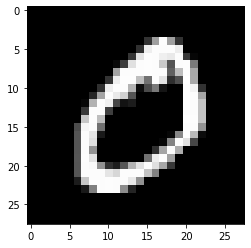

In [3]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [4]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [5]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])),columns=["x", "y", "targets"] )
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)

/Users/rajagopal/mlenv/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


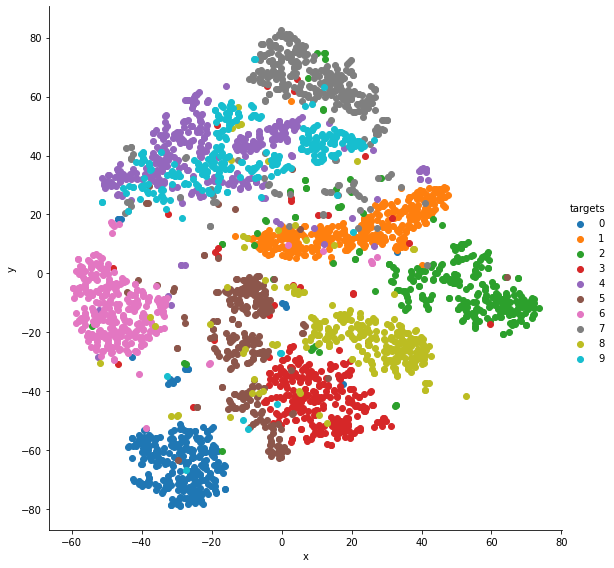

In [6]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [7]:
df = pd.read_csv("data/winequality-red.csv",sep=";")

In [8]:
quality_mapping = { 3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df_train,df_test = df.head(1000),df.tail(599)

In [11]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [12]:
cols = ['fixed acidity',
'volatile acidity', 'citric acid','residual sugar', 'chlorides',
'free sulfur dioxide', 'total sulfur dioxide', 'density',
'pH', 'sulphates', 'alcohol']

In [13]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [14]:
train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

In [15]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions )
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )
train_accuracy,test_accuracy


(0.595, 0.5492487479131887)

In [16]:
train_accuracies = [0.5] 
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    cols = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
    'free sulfur dioxide', 'total sulfur dioxide', 'density','pH','sulphates','alcohol'
    ]

    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score( df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions )

    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)

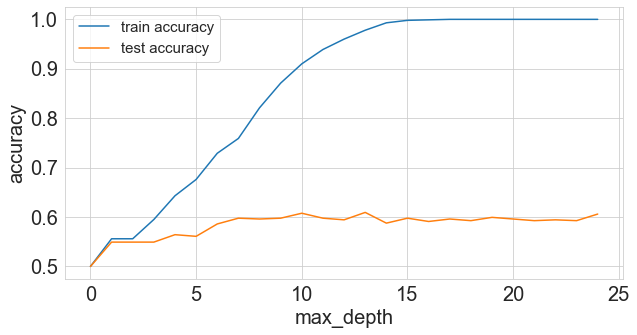

In [17]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 15}) 
plt.xticks(range(0, 26, 5)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20)
plt.show()

Text(0, 0.5, 'count')

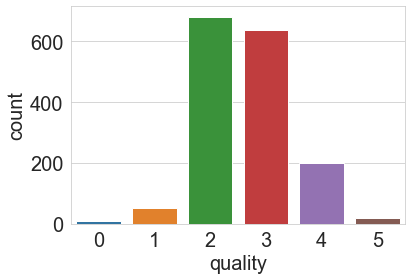

In [18]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

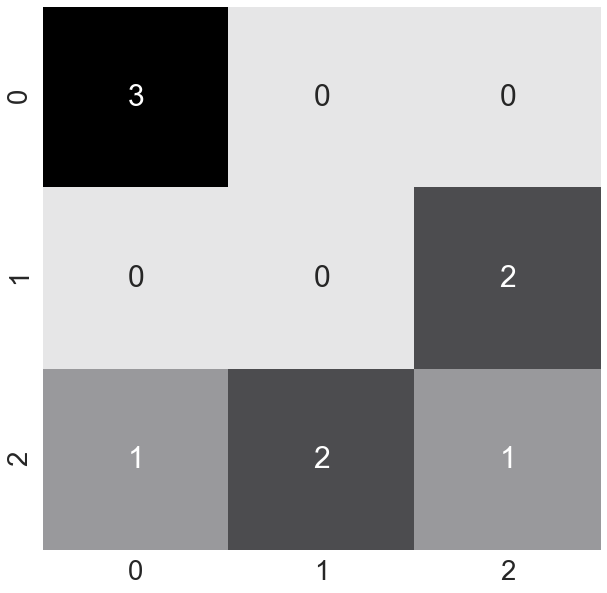

In [19]:

y_true = [0, 1, 2, 0, 1, 2,0, 2, 2] #some predictions
y_pred = [0, 2, 1, 0, 2, 1,0, 0, 2] # get confusion matrix from



cm = metrics.confusion_matrix(y_true, y_pred)
# plot using matplotlib and seaborn
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)

In [20]:
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [1, 0],
    []
    ]


In [21]:
y_pred = [
    [0,1,2],
    [1],
    [0,2,3],
    [2,3,4,0],
    [0]
    ]

In [22]:
def sum(elem):
    sm = 0
    for i in elem:
        sm+=i
    return sm

def pk(y_true,y_pred,k):
    if k==0:
        return 0
    common_values= set(y_pred[:k]).intersection(set(y_true))
    return len(common_values)/len(y_pred[:k])   

def apk(y_true, y_pred, k):
    pk_values=[]
    for iter in range(1, k + 1):
        pk_values.append(pk(y_true, y_pred, iter))
    if len(pk_values) == 0: 
        return 0
    return sum(pk_values) / len(pk_values)

def mapk(y_true, y_pred, k):
    apk_values = []
    for i in range(len(y_true)):
        apk_values.append(apk(y_true[i],y_pred[i],k))
    return sum(apk_values) / len(apk_values)

In [23]:
for j in range(1,4):
    print(f"{j}: {mapk(y_true,y_pred,j)}")       


1: 0.0
2: 0.05
3: 0.07777777777777777


In [29]:
joblib.dump( clf,os.path.join("data", f"dt.bin") )


['data/dt.bin']

In [30]:
import numpy as np
from sklearn import preprocessing

example = np.random.randint(1000, size=1000000)

ohe = preprocessing.OneHotEncoder(sparse=False)
ohe_example = ohe.fit_transform(example.reshape(-1, 1)) # print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

ohe = preprocessing.OneHotEncoder(sparse=True)
ohe_example = ohe.fit_transform(example.reshape(-1, 1)) # print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")

full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)

print(f"Full size of sparse array: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of sparse array: 16000004


In [3]:
a = np.array([1, 3, 2, 4])

In [5]:
b = np.array([[8, 5, 6, 1],
                      [4, 3, 0, 7],
[1, 3, 2, 9]])

In [9]:
b[:,0]

array([8, 4, 1])

In [10]:
b.shape

(3, 4)

In [16]:
a[1:3] == np.array([3, 2])

array([ True,  True])

In [19]:
a[1:]== np.array([3, 2, 4])

array([ True,  True,  True])

In [20]:
a[0:len(a)-1]== np.array([1, 3, 2])

array([ True,  True,  True])

In [21]:
a[::2]

array([1, 2])

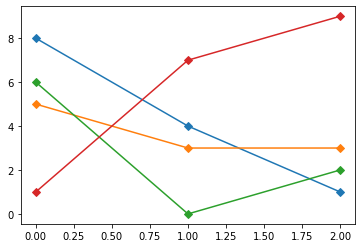

In [26]:
plt.plot(b, 'D-')

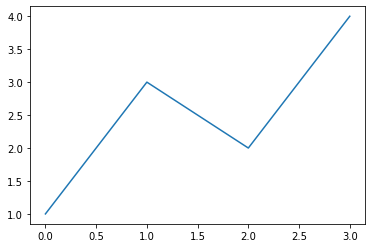

In [22]:
plt.plot(a)

In [27]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)


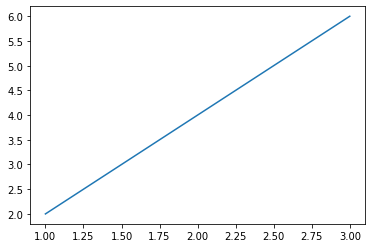

In [44]:
plt.plot([1,3],[2,6])

Text(0.5, 1.0, 'Blue circles and Red crosses')

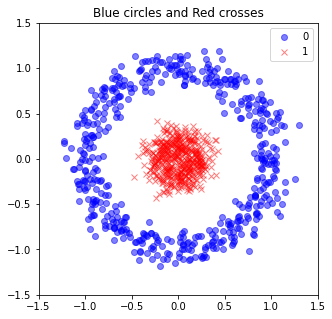

In [28]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


In [30]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.5),
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 [==============================] - 0s 614us/step - loss: 0.6731 - accuracy: 0.6470
Epoch 2/20
32/32 [==============================] - 0s 736us/step - loss: 0.5949 - accuracy: 0.7760
Epoch 3/20
32/32 [==============================] - 0s 765us/step - loss: 0.4898 - accuracy: 0.8600
Epoch 4/20
32/32 [==============================] - 0s 801us/step - loss: 0.3972 - accuracy: 0.8900
Epoch 5/20
32/32 [==============================] - 0s 812us/step - loss: 0.3016 - accuracy: 0.9240
Epoch 6/20
32/32 [==============================] - 0s 783us/step - loss: 0.2261 - accuracy: 0.9910
Epoch 7/20
32/32 [==============================] - 0s 954us/step - loss: 0.1727 - accuracy: 1.0000
Epoch 8/20
32/32 [==============================] - 0s 931us/step - loss: 0.1374 - accuracy: 1.0000
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 1.0000
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 1.0000
Epo

In [33]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)

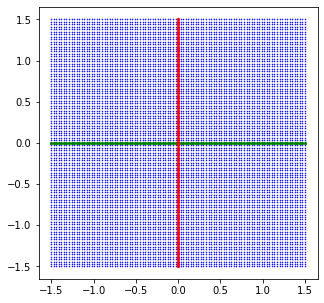

In [34]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=0.3, color='blue')
plt.scatter(aa[50], bb[50], s=5, color='green')
plt.scatter(aa[:, 50], bb[:, 50], s=5, color='red')

In [35]:
ab = np.c_[aa.ravel(), bb.ravel()]

In [36]:
c = model.predict(ab)

In [37]:
cc = c.reshape(aa.shape)

Text(0.5, 1.0, 'Blue circles and Red crosses')

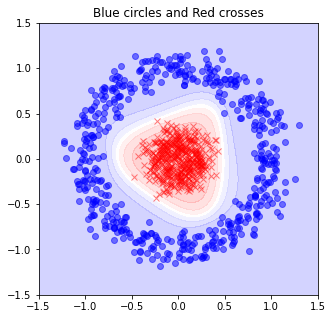

In [38]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.title("Blue circles and Red crosses")

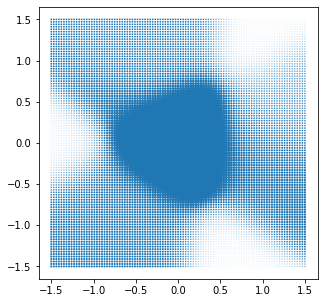

In [39]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=20*cc)


In [52]:
g = np.linspace(0,1,2)
h = np.linspace(1,2,3)
np.meshgrid(g,h)

[array([[0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[1. , 1. ],
        [1.5, 1.5],
        [2. , 2. ]])]

In [53]:
g,h

(array([0., 1.]), array([1. , 1.5, 2. ]))

In [54]:
aa.ravel().shape

(10201,)